### CB.EN.P2AEL23023

## <center>KMean Clustering</center>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [199]:
def Plot(X,Attr,centroid=False):
    ax = sns.scatterplot(x=X.iloc[:,0],y=X.iloc[:,1],hue=Attr[1],palette='Paired').set_title("Cluster Plot")
    if centroid : plt.scatter(Attr[2][:,0],Attr[2][:,1],s=30,color='Black',marker="x")
    return

def Model(X,k):
    model = KMeans(n_clusters=k)
    model.fit_transform(X)
    return [model.inertia_,model.labels_,model.cluster_centers_]

def WCSS(X,K):
    wcss, axis = [],[]
    for i in range(1,K+1):
        wcss.append(Model(X,i)[0])
        axis.append(i)
    sns.lineplot(x=axis,y=wcss,marker='o').set_title("Elbow Plot")
    plt.grid()
    return wcss
    

### Mall Customer Dataset

In [200]:
data = pd.read_csv('../Data/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


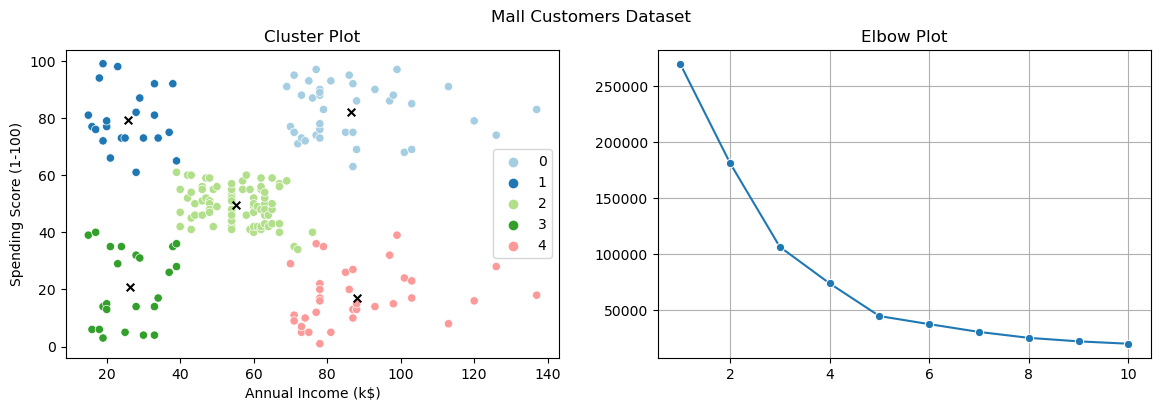

In [201]:
x = data.iloc[:,3:5]
attr = Model(x,5)
fig = plt.figure(figsize=(14,4))
fig.suptitle("Mall Customers Dataset")
fig.add_subplot(1,2,1)
Plot(x,attr,centroid=True)
fig.add_subplot(1,2,2)
WCSS(x,10);

### Iris Dataset

In [202]:
data = pd.read_csv('../Data/iris.csv',names=['Sepal_length','Sepal_width','Petal_length','Petal_width','Species'])
data.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Text(0.5, 1.0, 'Original Plot')

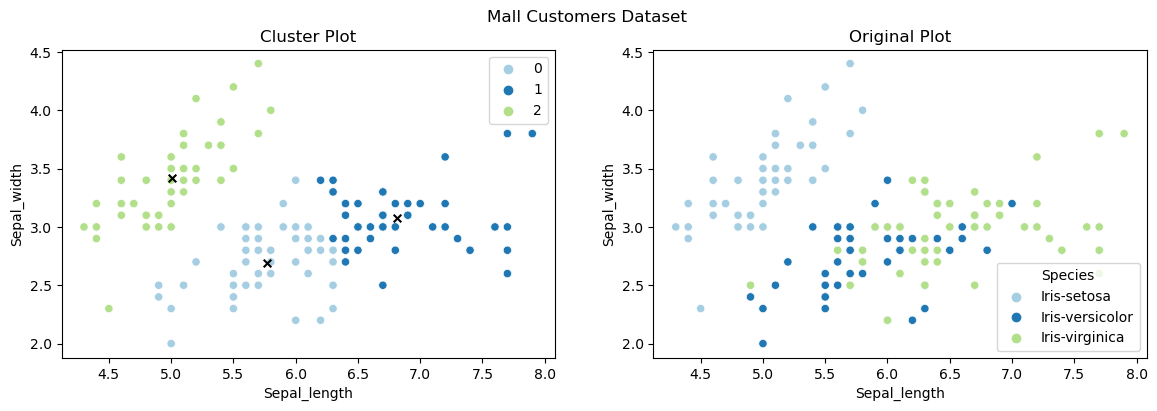

In [203]:
x = data.iloc[:,0:2]
attr = Model(x,3)
fig = plt.figure(figsize=(14,4))
fig.suptitle("Mall Customers Dataset")
fig.add_subplot(1,2,1)
Plot(x,attr,centroid=True)
fig.add_subplot(1,2,2)
sns.scatterplot(x=x.iloc[:,0],y=x.iloc[:,1],palette='Paired',hue=data['Species']).set_title("Original Plot")

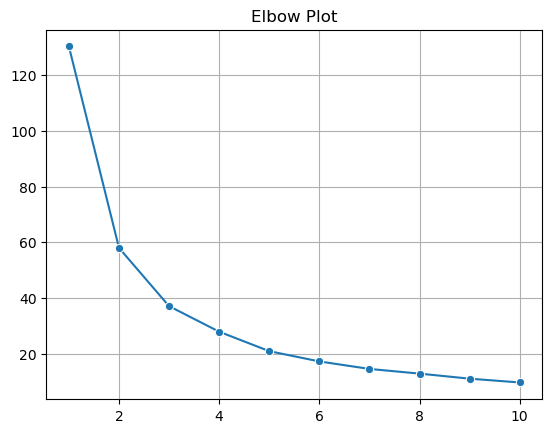

In [197]:
WCSS(x,10);